## Credit Card Fraud Detection using CNN

In [1]:
'''
Before running the program first download the dataset from Kaggle, using the link "https://www.kaggle.com/mlg-ulb/creditcardfraud" 
and place that dataset in the same folder as this program.
'''

'\nBefore running the program first download the dataset from Kaggle, using the link "https://www.kaggle.com/mlg-ulb/creditcardfraud" \nand place that dataset in the same folder as this program.\n'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

C:\Users\Shivam\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shivam\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shivam\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shivam\AppData\Roaming\Python\Python36\s

2.0.0-beta1


C:\Users\Shivam\AppData\Roaming\Python\Python36\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shivam\AppData\Roaming\Python\Python36\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shivam\AppData\Roaming\Python\Python36\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shivam\AppData\Roam

In [3]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset 

In [9]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [10]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,133297.0,0.039376,0.129873,0.734072,-0.987374,0.092650,0.121022,0.617236,-0.167413,0.959963,...,0.212250,0.846109,0.022975,0.512179,-0.894310,0.264925,-0.171142,-0.108693,74.99,0
980,80635.0,-5.548018,6.579066,-6.076670,1.031910,-2.329146,-2.768312,-1.814887,2.958108,2.036134,...,-0.361156,-0.667886,0.752107,0.251763,0.555506,-0.319915,1.251527,0.670050,2.69,0
981,150821.0,-0.368955,0.856267,-0.856324,-1.102347,0.575889,-0.227469,1.011648,0.337388,-0.454541,...,-0.022492,-0.169871,0.121535,0.291117,0.192667,-0.142039,0.041556,-0.042432,92.41,0
982,85050.0,-1.076956,0.915274,1.521836,-1.391097,0.268074,-1.111835,1.239230,-0.805860,0.398282,...,-0.084570,0.007664,-0.202116,0.465296,-0.373022,0.639499,-0.753334,-0.203284,23.05,0


In [13]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [16]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [19]:
X_train.shape

(787, 30)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN 

In [22]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [24]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.6582 - accuracy: 0.6874 - val_loss: 0.6245 - val_accuracy: 0.8122
Epoch 2/20
787/787 [==============================] - 0s 193us/sample - loss: 0.3988 - accuracy: 0.8450 - val_loss: 0.5924 - val_accuracy: 0.7716
Epoch 3/20
787/787 [==============================] - 0s 189us/sample - loss: 0.3685 - accuracy: 0.8679 - val_loss: 0.5681 - val_accuracy: 0.7817
Epoch 4/20
787/787 [==============================] - 0s 191us/sample - loss: 0.3069 - accuracy: 0.8856 - val_loss: 0.5382 - val_accuracy: 0.8020
Epoch 5/20
787/787 [==============================] - 0s 182us/sample - loss: 0.3278 - accuracy: 0.8958 - val_loss: 0.5063 - val_accuracy: 0.8528
Epoch 6/20
787/787 [==============================] - 0s 186us/sample - loss: 0.2781 - accuracy: 0.8958 - val_loss: 0.4718 - val_acc

In [26]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

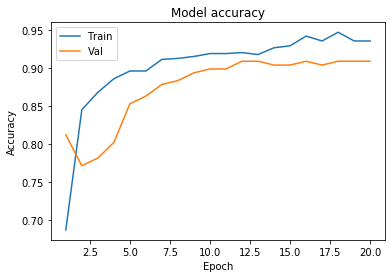

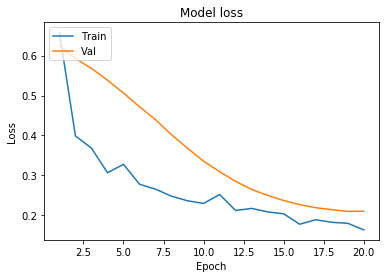

In [27]:
plot_learningCurve(history, epochs)

### Adding MaxPool 

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 2s 2ms/sample - loss: 1.1020 - accuracy: 0.5578 - val_loss: 0.6766 - val_accuracy: 0.5330
Epoch 2/50
787/787 [==============================] - 0s 203us/sample - loss: 0.8175 - accuracy: 0.6379 - val_loss: 0.6338 - val_accuracy: 0.7411
Epoch 3/50
787/787 [==============================] - 0s 196us/sample - loss: 0.7102 - accuracy: 0.6811 - val_loss: 0.5959 - val_accuracy: 0.7716
Epoch 4/50
787/787 [==============================] - 0s 196us/sample - loss: 0.6062 - accuracy: 0.7510 - val_loss: 0.5602 - val_accuracy: 0.7970
Epoch 5/50
787/787 [==============================] - 0s 197us/sample - loss: 0.5300 - accuracy: 0.7687 - val_loss: 0.5268 - val_accuracy: 0.8020
Epoch 6/50
787/787 [==============================] - 0s 204us/sample - loss: 0.5243 - accuracy: 0.7840 - val_loss: 0.4918 - val_accuracy: 0.8325
Epoch 7/50
787/787 [==============================] - 0s 217us/sample - loss: 0.

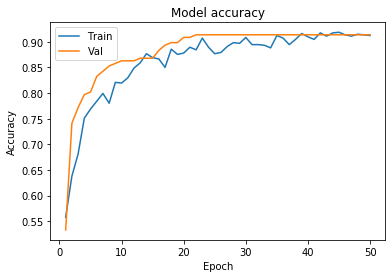

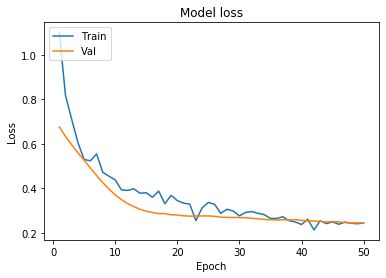

In [33]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)